# Question 1a: %timeit
You may know from your experiences with matlab that you should always prefer vector- or matrix-based operations over for loops, if possible (hence the name **mat**(rix)**lab**(oratory)). The same is true of python -- you should prefer numpy-array-based operations over for loops. This will also be important for tensorflow -- as much as possible, you should avoid using python for loops when writing tensorflow code. To examine the impact of using for loops over numpy-array-based operations, for this question, you will exploit one of jupyter's built-in magic commands, `%timeit`:

In [1]:
import numpy as np
%timeit np.zeros((100,100))  # provide statistics on how long it takes to generate a 100x100 array of 0s

4.05 µs ± 260 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


As you can see, all you need to do is put `%timeit` before the command that you would normally run and jupyter will run that line multiple times to generate computation timing statistics.

Now, let's compare the computation timing for multiplying two random matrices, each with a dimension of 100x100, using 1) `np.matmul` and 2) multiple embedded for loops. For (2), please write your own function to implement the for loops. Feel free to wrap (2) into a function definition. Verify that (1) and (2) produce the same output. According to `%timeit`, how many times faster is (1) than (2)?

In [2]:
#using matrix multiplication function
a = np.random.randn(100,100)
b = np.random.randn(100,100)
%timeit np.matmul(a,b)
def LoopMultiply(a,b):
    result = np.zeros((a.shape[0],b.shape[1]))
    count1=-1
    count2=-1
    for row in a:
        count1=count1+1
        count2=-1
        for col in b.T:
            count2=count2+1
            result[count1][count2] = np.sum(row*col)
    return result
%timeit result = LoopMultiply(a,b)

print("Output Verification")
ov1=np.array([[2, 3],[10, 8]])
ov2=np.array([[1, 4],[2, 3]])
OV1=np.matmul(ov1,ov2)
OV2=LoopMultiply(ov1,ov2)
print(OV1)
print(OV2)
print("The outputs from my user defined function with ultiple loops produce the same results as the output of matmul,")
print("as shown above. Also, the matmul function is about 1000 times faster than the function I made with multiple")
print("for loops, showing that my user defined function is much more inefficient.")

113 µs ± 32.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
85.6 ms ± 7.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Output Verification
[[ 8 17]
 [26 64]]
[[ 8. 17.]
 [26. 64.]]
The outputs from my user defined function with ultiple loops produce the same results as the output of matmul,
as shown above. Also, the matmul function is about 1000 times faster than the function I made with multiple
for loops, showing that my user defined function is much more inefficient.


# Question 1b
There are two main ways of computing convolutions digitally: 1) directly, using the definition of a convolution, and 2) using the convolution theorem that you proved in the written portion of this homework assignment (i.e., using ffts). Which method is more efficient depends on the sizes of the inputs. Let's use `%timeit` to compare the speeds for 1D convolutions using [`scipy.signal.convolve `](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). This function has an argument called "method", which can be set to "direct" or "fft", which correspond to (1) and (2) above. Use this function to convolve two random 1D signals of lengths $n=100, 500, 1000,$ and $2000$, and compare the speed of both methods. For which n do(es) method 1 outperform method 2, and vice versa? Can you make any generalizations based on these results about when one method outperforms the other?

In [3]:
from scipy.signal import convolve
n=[100, 500, 1000, 2000]
for num_n in n:
    c=np.random.rand(1,num_n)
    d=np.random.rand(1,num_n)
    print("Method=direct, n=" + str(num_n))
    %timeit convolve(c,d, method='direct') 
    print("Method=fft, n=" + str(num_n))
    %timeit convolve(c,d, method='fft')


print("The direct method is slightly faster for n=100, slower for n=500, 1000, or 2000.")
print("Generally it seems that the fft method is faster when the size is greater than 100x100,")
print("but either comparable or slightly slower for n=100 or less.")

Method=direct, n=100
396 µs ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method=fft, n=100
365 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method=direct, n=500
8.53 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Method=fft, n=500
451 µs ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method=direct, n=1000
37.4 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Method=fft, n=1000
630 µs ± 149 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method=direct, n=2000
201 ms ± 57.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Method=fft, n=2000
921 µs ± 397 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The direct method is slightly faster for n=100, slower for n=500, 1000, or 2000.
Generally it seems that the fft method is faster when the size is greater than 100x100,
but either comparable or slightly slower for n=100 or less.


# Question 2: the convolution theorem
As we investigated in question 1b, it is also possible to do convolutions using Fourier transforms, and in some cases this is the preferable method. In fact, there is some body of work investigating the use of ffts and multiplication to do convolution operations in convolutional neural networks. 

For this question, to illustrate this theorem, given a convolutional kernel you will find the corresponding Fourier operation that produces the same result. To this end,

1. create a 7x7 Gaussian kernel with a standard deviation $\sigma=2$ (using a pixel grid spacing of 1)
2. load an image, if it is color then convert it to grayscale (you can just sum the 3 color channels), and then resize the image into a 128x128 array
3. compute the convolution  - you can use a numpy (np) or scipy function. Make sure the output is the same size as the input image, which is slightly different than the formal definition of a discrete convolution, but is something that is usually convenient to do.
4. Find the Fourier filter that does the same operation in the Fourier domain, and show the resulting blurred image implemented using the Fourier method (i.e., if $I_{2}=I_{1}*h$, then $\mathcal{F}[I_{2}]=\mathcal{F}[I_{1}]\mathcal{F}[h]$, so find the correct array for $\mathcal{F}[h]$ and re-generate $I_2$). 

In [4]:
%matplotlib inline
import numpy.linalg as linalg
import math 
def gkern2(kernlen,nsig):
    # create nxn zeros
    inp = np.zeros((kernlen, kernlen))
    # set element at the middle to one, a dirac delta
    inp[kernlen//2, kernlen//2] = 1
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return fi.gaussian_filter(inp, nsig)
GKernel=gkern2(7,2)
print("Gaussian Kernel")
print(GKernel)

Gaussian Kernel
[[0.00841914 0.01190549 0.01636179 0.01838305 0.01636179 0.01190549
  0.00841914]
 [0.01190549 0.01683553 0.02313716 0.02599543 0.02313716 0.01683553
  0.01190549]
 [0.01636179 0.02313716 0.03179754 0.03572567 0.03179754 0.02313716
  0.01636179]
 [0.01838305 0.02599543 0.03572567 0.04013906 0.03572567 0.02599543
  0.01838305]
 [0.01636179 0.02313716 0.03179754 0.03572567 0.03179754 0.02313716
  0.01636179]
 [0.01190549 0.01683553 0.02313716 0.02599543 0.02313716 0.01683553
  0.01190549]
 [0.00841914 0.01190549 0.01636179 0.01838305 0.01636179 0.01190549
  0.00841914]]


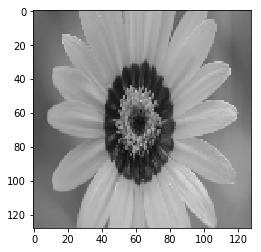

In [22]:
%matplotlib inline 
from scipy import misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, imsave, figure
import numpy as np
import requests
import imageio
from PIL import Image
import io
from io import BytesIO
import skimage

#url= "https://cdn.theatlantic.com/assets/media/img/mt/2017/10/Pict1_Ursinia_calendulifolia/lead_720_405.jpg?mod=1533691909"
#response=requests.get(url)
I = Image.open('flower.jpg')
imshow(I)
#I2 = imageio.imread(url)
width=128
height=128
gray =I.convert('L')
imshow(gray)
small = gray.resize((width, height), Image.NEAREST) 
imshow(small)
#photo_data = imageio.imread('flower.jpg')
from skimage import color
I3=np.asarray(small)
#photo_data=photo_data.resize((width,height),Image.NEAREST)
#r=I3[:,:,0]
#g=I3[:,:,1]
#b=I3[:,:,2]
#print(r.shape)
#print(g.shape)
#print(b.shape)
#print(photo_data.shape)
#gray=(r+g+b)/255
#gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
#imshow(b)
#imshow(greyscale_image)
#print(gray)

Size Output: (128, 128)
Size Input: (128, 128)


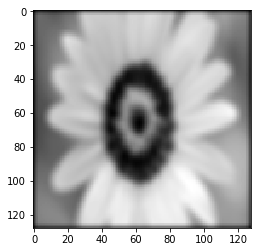

In [24]:
import scipy
from scipy import signal
#C = signal.fftconvolve(I3, GKernel[:, :, np.newaxis], mode='same')
C=scipy.signal.convolve2d(I3,GKernel, mode='same')
imshow(C, cmap='gray')
print("Size Output: "+ str(C.shape)) 
print("Size Input: "+ str(I3.shape)) 


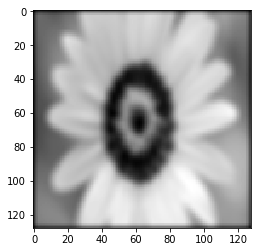

In [25]:
F_output=np.fft.fftshift(np.fft.fftn(C))
F_input=np.fft.fftshift(np.fft.fftn(I3))
H=np.linalg.solve(F_input,F_output)
F_I2=np.matmul(F_input,H)
original=np.fft.fftshift(np.fft.fftshift(np.fft.ifftn(F_I2)))
abs_original=abs(original)
imshow(abs_original,cmap='gray')

# Question 3: data augmentation
One indispensable tool used in deep learning is data augmentation. That is, we can to some extent artificially increase the size of our dataset by randomly altering the current dataset. One common augmenting operation is to do random crops of the original image. For example, researchers designing neural networks for ImageNet, a dataset of natural RGB images, typically resize the images to 256x256x3 and then take a random 224x224x3 crop such that the latter fits entirely in the former.

For this question, take a picture with your phone or find a picture online, load it into jupyter, resize it to 256x256x3 (discard the alpha channel if one is present), and then perform the random 224x224x3 crop. The crops should be uniformly distributed within the bounding 256x256 box and do not need to be rotated. Please display the 256x256x3 image and 5 random crops using `plt.imshow`.

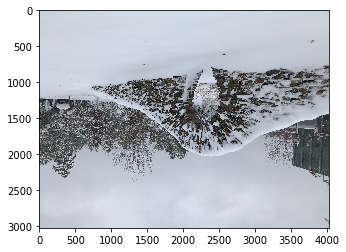

In [35]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
snow = Image.open('IMG_0361.JPG')
imshow(snow)

# your code here; feel free to use multiple cells

Dimensions of Image: (256, 256, 3)


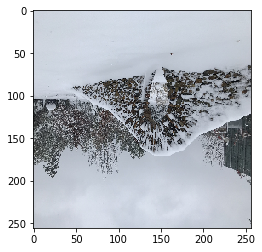

In [27]:
width=256
height=256
smallsnow = snow.resize((width, height), Image.NEAREST) 
imshow(smallsnow)
SS=np.asarray(smallsnow)
print("Dimensions of Image: "+ str(SS.shape))


Cropped Dimensions:(224, 224, 3)
Cropped Dimensions:(224, 224, 3)
Cropped Dimensions:(224, 224, 3)
Cropped Dimensions:(224, 224, 3)
Cropped Dimensions:(224, 224, 3)


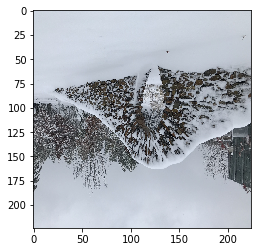

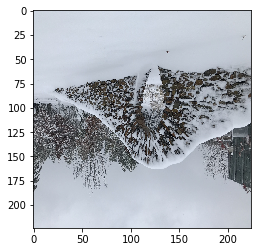

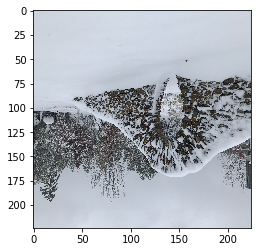

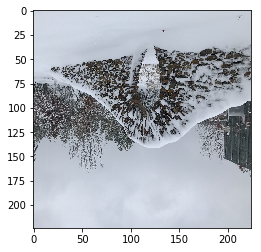

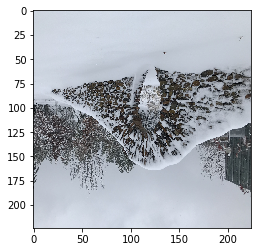

In [32]:
%matplotlib inline 
# used https://github.com/matterport/Mask_RCNN/issues/230
width_crop=224
height_crop=224
for i in range(5):
    x_cropped = np.random.randint(0, SS.shape[1] - width_crop)
    y_cropped = np.random.randint(0, SS.shape[0] - height_crop)
    SS_cropped = SS[y_cropped:y_cropped+height_crop, x_cropped:x_cropped+width_crop]
    #plt.subplot(1, 5, i + 1)
    figure()
    imshow(SS_cropped)
    print("Cropped Dimensions:" + str(SS_cropped.shape))

In [30]:
# the following line will cause subsequent plotting commands to display directly in the notebook
# used https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy?fbclid=IwAR3jSaBXnZ0rbzwXH2t-oqO55QAa2BfNZA_UV-V9eQJ2L2STA5Q_-0WDLWI
%matplotlib inline
import numpy.linalg as linalg
import math 
N=np.array(7)
print(N)
stdev=np.array(2)
print(stdev)
mu=np.array(0)
print(mu)
x=np.array(np.linspace(-10,10,41))
y=np.array(np.linspace(-10,10,41))
x=np.array(np.linspace(-2,2,5))
y=np.array(np.linspace(-2,2,5))
print(x)
print(x.shape[0])
count1=-1
count2=-1    
gx=np.zeros((x.shape[0],y.shape[0]))
gy=np.zeros((x.shape[0],y.shape[0]))
for num_x in x:
    count1=count1+1
    gx[count1]=1/(stdev*(2*math.pi)**(.5))*math.exp(.5*((num_x-mu)/stdev)**(2))
for num_y in y:
    count2=count2+1
    gy[count2]=1/(stdev*(2*math.pi)**(.5))*math.exp(.5*((num_y-mu)/stdev)**(2))
print(gx.shape)
print(gy.shape)
print(gx)
print(gy)


7
2
0
[-2. -1.  0.  1.  2.]
5
(5, 5)
(5, 5)
[[0.32887231 0.32887231 0.32887231 0.32887231 0.32887231]
 [0.22603041 0.22603041 0.22603041 0.22603041 0.22603041]
 [0.19947114 0.19947114 0.19947114 0.19947114 0.19947114]
 [0.22603041 0.22603041 0.22603041 0.22603041 0.22603041]
 [0.32887231 0.32887231 0.32887231 0.32887231 0.32887231]]
[[0.32887231 0.32887231 0.32887231 0.32887231 0.32887231]
 [0.22603041 0.22603041 0.22603041 0.22603041 0.22603041]
 [0.19947114 0.19947114 0.19947114 0.19947114 0.19947114]
 [0.22603041 0.22603041 0.22603041 0.22603041 0.22603041]
 [0.32887231 0.32887231 0.32887231 0.32887231 0.32887231]]
